In [199]:
# -*- coding: utf-8 -*-
"""
File:   hw0.py
Author: 
Date:   
Desc:   
    
"""


""" =======================  Import dependencies ========================== """

import numpy as np
import matplotlib.pyplot as plt
import math

plt.close('all') #close any open plots

"""
===============================================================================
===============================================================================
============================ Question 1 =======================================
===============================================================================
===============================================================================
"""
""" ======================  Function definitions ========================== """

def plotData(x1,t1,x2=None,t2=None,x3=None,t3=None,legend=[]):
    '''plotData(x1,t1,x2,t2,x3=None,t3=None,legend=[]): Generate a plot of the 
       training data, the true function, and the estimated function'''
    p1 = plt.plot(x1, t1, 'bo') #plot training data
    if(x2 is not None):
        p2 = plt.plot(x2, t2, 'g') #plot true value
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r') #plot training data

    #add title, legend and axes labels
    plt.ylabel('t') #label x and y axes
    plt.xlabel('x')
    
    if(x2 is None):
        plt.legend((p1[0]),legend)
    if(x3 is None):
        plt.legend((p1[0],p2[0]),legend)
    else:
        plt.legend((p1[0],p2[0],p3[0]),legend)
        
def fitdata_poly(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    return w

def findmeans(start,stop,steps):
    eq_spaced = np.linspace(start,stop,steps+1)
    means = []
    for j in range(0,steps):
        # means.append(round(((eq_spaced[j] + eq_spaced[j+1])/2),4))
        means.append(format(((eq_spaced[j] + eq_spaced[j+1])/2),'.5f'))
    return means

def fitdata_rbs(x,t,M):
    basis = []
    means = findmeans(-4,4,M)
    for row_index in range(M+1):
        for col_index in range(len(x)+1):
            basis[row_index,col_index] = np.exp((-1)*(((x[col_index]) - (means[row_index])**2))/(2*(.2)**2))
    basis = np.array(basis).T
    w = np.linalg.inv(basis.T@basis)@basis.T@t
    return w

In [178]:
""" ======================  Variable Declaration ========================== """
# M = 7 #regression model order
k = 1 #Huber M-estimator tuning parameter

""" =======================  Load Training Data ======================= """
data_uniform = np.load('TrainData.npy')
x_training = data_uniform[:,0]
t_training = data_uniform[:,1]

x_sinc = np.arange(-4,4,.001)
t_sinc = np.sinc(x2)

In [189]:
""" ========================  Train the Model ============================= """
"""This is where you call functions to train your model with different RBF kernels   """
# Polynomial training
w_poly = fitdata_poly(x_training,t_training,9)
x_poly = np.arange(-3,3,0.001) #equally spaced points
X_poly = np.array([x_poly**m for m in range(w_poly.size)]).T
t_poly = X_poly@w_poly #predicted value

## Check best M using RMSE
# Initialize variables
rmse_check = np.zeros((len(x_training),1))
# Calculate rmse across all M
for M in range(1,(len(x_training)+1)):
    w_check = fitdata(x_training,t_training,M)
    #x_check = np.arange(-3,3,0.001) #equally spaced points
    X_check = np.array([x_training**m for m in range(w_check.size)]).T
    t_check = X_check@w_check #predicted value
    inst_error_check = (t_check - t_training) #calculate instantaneous error
    rmse_check[M-1,0] = math.sqrt((inst_error_check.T@inst_error_check)/len(x_training)) #calculate rmse
rmse_min_check = rmse_check.argmin() + 1

## RBS
# basis = exp(-((x-mean(i))^2)/(2s^2)

In [185]:
""" ======================== Load Test Data  and Test the Model =========================== """

"""This is where you should load the testing data set. You shoud NOT re-train the model   """

data_test = np.load('TestData.npy')

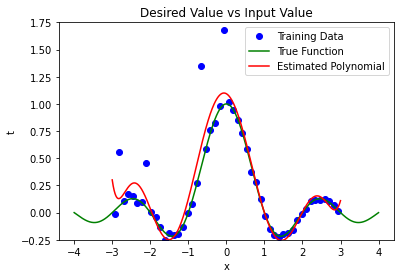

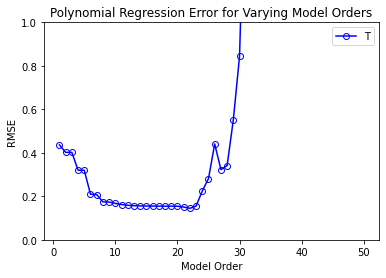

In [186]:
""" ========================  Plot Results ============================== """

""" This is where you should create the plots requested """
## Scatter plot -- Desired Value vs Input Value
plt.figure()
plotData(x1,t1,x_sinc,t_sinc,x_poly,t_poly,['Training Data','True Function','Estimated Polynomial'])
# plt.title("Desired Value vs Input Value: M= " + str(M))
plt.title("Desired Value vs Input Value")
plt.ylim(-0.25,1.75)

## Polynomial Regression Error for Varying Model Orders
plt.figure()
p1 = plt.plot(np.arange(1,len(x_training)+1),rmse_check,marker='o', color='b', fillstyle='none')
plt.ylim(0,1)
plt.xlabel("Model Order")
plt.ylabel("RMSE")
plt.title("Polynomial Regression Error for Varying Model Orders")
plt.legend("Training Error")
plt.show()

In [ ]:
""" ======================  Variable Declaration ========================== """
M =  3 #regression model order
k = 1 #Huber M-estimator tuning parameter

""" =======================  Load Training Data ======================= """
data_uniform = np.load('TrainData.npy')
x1 = data_uniform[:,0]
t1 = data_uniform[:,1]

x2 = x1
t2 = np.sinc(x2)

plotData(x1,t1,x2,t2)
    
""" ========================  Train the Model ============================= """
"""This is where you call functions to train your model with different RBF kernels   """



""" ======================== Load Test Data  and Test the Model =========================== """

"""This is where you should load the testing data set. You shoud NOT re-train the model   """
   


""" ========================  Plot Results ============================== """

""" This is where you should create the plots requested """

In [171]:
np.array([x_training[0:4]**m for m in range(5)]).T

array([[  1.        ,   1.        ,   1.        ,   1.        ],
       [ -2.94      ,  -2.82      ,  -2.7       ,  -2.58      ],
       [  8.6436    ,   7.9524    ,   7.29      ,   6.6564    ],
       [-25.412184  , -22.425768  , -19.683     , -17.173512  ],
       [ 74.71182096,  63.24066576,  53.1441    ,  44.30766096]])

In [196]:
basis = np.exp((-1)*((6-2)**2)/(2*(.2)**2))
basis

1.3838965267367769e-87

In [200]:
dubu = fitdata_rbs(x_training,t_training,9)

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'